## Downloading data

In [1]:
#you should upload here segm_input_data.csv
from google.colab import files
uploaded = files.upload()

Saving segm_input_data.csv to segm_input_data (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['segm_input_data.csv']), sep= "|" )

In [0]:
#df

## Preparing data

In [0]:
import pandas as pd
from sklearn import preprocessing

del df['CUST_INTRL_ID']
del df['CUST_TYPE_CD']
del df['JRSDCN_CD']



In [0]:
normalized_df_by_mean_and_std =(df-df.mean())/df.std()
normalized_df_by_min_max =(df-df.min())/(df.max()-df.min())
normalized_df = normalized_df_by_min_max

## 0.Testing DBSCAN and KMeans

In [0]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np

In [0]:
#Split the dataset into two subsets: train and test (e.g. 80-20).
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(normalized_df, test_size=0.2, random_state=1)

In [0]:
from sklearn.cluster import DBSCAN, KMeans
#First Clustering Algorithm (DBSCAN)
clustering = DBSCAN(eps=1.3, min_samples=3).fit_predict(normalized_df)
#clustering.labels_

#Second Clustering Algorithm 
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_train)
predictions_KMeans = kmeans.predict(X_test)
#kmeans.labels_

In [0]:
#Checking the accuracy
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

silhouette_avg_db = silhouette_score(normalized_df, clustering)
davies_score_db = davies_bouldin_score(normalized_df, clustering)

silhouette_avg_KM = silhouette_score(X_test, predictions_KMeans)
davies_score_KM = davies_bouldin_score(X_test, predictions_KMeans)

In [21]:
# The results of testing
# silhouette_score (the best value is 1 the worst is 1)
# davies_score (the best value is 0)
print("For DBSCAN results is: {},{}".format(silhouette_avg_db, davies_score_db)) 
print("For kmeans results is: {},{}".format(silhouette_avg_KM, davies_score_KM))

For DBSCAN results is: 0.4439020205715726,0.43217993976277885
For kmeans results is: 0.32051897798546364,1.098885194205661


## 1.Testing HBSCAN and c-means




In [0]:
#!pip install hdbscan
#!pip install fuzzy-c-means

### HDBSCAN

In [0]:
import hdbscan
from fcmeans import FCM

In [32]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(normalized_df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [0]:
#clusterer.labels_

In [37]:
# The results of testing
# silhouette_score (the best value is 1 the worst is 1)
# davies_score (the best value is 0)

silhouette_avg_db = silhouette_score(normalized_df, clusterer.labels_)
davies_score_db = davies_bouldin_score(normalized_df, clusterer.labels_)

print("For HDBSCAN results is: silhouette_score: {},  davies_score: {}".format(silhouette_avg_db, davies_score_db)) 

For HDBSCAN results is: silhouette_score: 0.12139365771272398,  davies_score: 1.672743447295139


###C-means

In [0]:
from fcmeans import FCM

In [0]:
#Second Clustering Algorithm 
fcm = FCM(n_clusters=7, random_state=0).fit(X_train)
predictions_fcm = fcm.predict(X_test)

In [0]:
predictions_fcm = fcm.predict(X_test)

In [0]:
#predictions_fcm

In [57]:
silhouette_avg_fcm = silhouette_score(X_test, predictions_fcm)
davies_score_fcm = davies_bouldin_score(X_test, predictions_fcm)

print("For cmeans results silhouette_score: {},  davies_score: {}".format(silhouette_avg_fcm, davies_score_fcm))

For cmeans results silhouette_score: 0.17074381690370163,  davies_score: 1.3289498946906861


## 2.Survial data. KM and Cox estimators

In [0]:
#!pip install lifelines

In [0]:
#df2 = pd.read_csv('dataset.csv')
#df2.head()

### Survial data

In [0]:
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_dd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [0]:
## df з двох колонок, які мені потрібні
df_spec = data[['duration', 'observed']]

In [110]:
df_spec.head()

,duration,observed
0,7,1
1,10,1
2,10,1
3,5,0
4,1,0


### Kaplan-Meier estimator


In [0]:
kmf = KaplanMeierFitter()

In [93]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

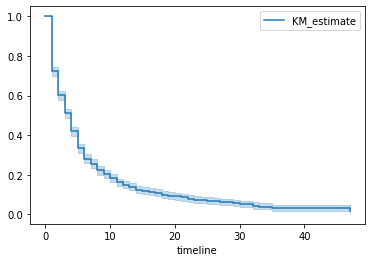

In [73]:
kmf.plot()

In [0]:
#kmf.median_survival_time_
#   4.0

### COX estimator

In [0]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

In [123]:
rossi_dataset = load_rossi()
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [124]:
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [125]:
cph.print_summary()

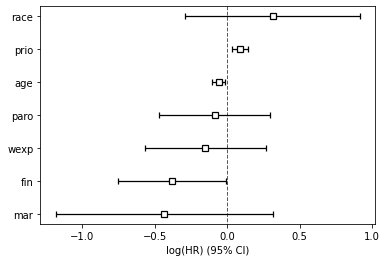

In [127]:
cph.plot()

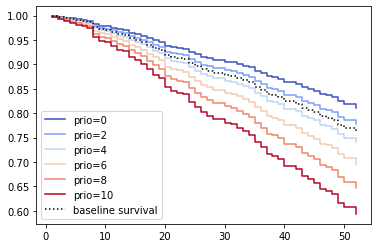

In [133]:
cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')

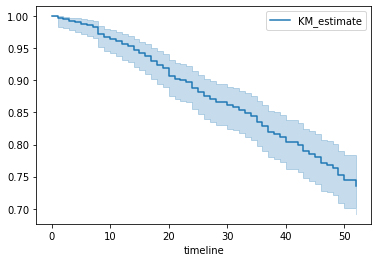

In [131]:
# using kmf for survial data which I use for 
kmf1 = KaplanMeierFitter()
T = rossi_dataset["week"]
E = rossi_dataset["arrest"]

kmf1.fit(T, event_observed=E)
kmf1.plot()

## 3.Conclusion

Will be on the GitHub Read.me
